# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import prepare as p
import explore as e

# Acquire

* This dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey)
* I used the unencoded version of the data
* Each observation is a survey filled out by a Starbucks customer
* Each feature is a question asked in the survey or a timestamp for that survey
* This dataset contains 21 features and 122 observations

[Income Classification in Malaysia: What is B40, M40, and T20](https://www.iproperty.com.my/guides/what-is-b40-m40-t20-in-malaysia/) by Rebecca Hani Romeli was referenced for information regarding Malaysian currency and income levels

In [2]:
df = pd.read_csv('starbucks_survey.csv')

# Prepare

In [3]:
df = p.prepare_customer_survey(df)
df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,gender,age_group,employment_status,annual_income_group,visit_frequency,dining_type,visit_length,distance_away,membership_card,most_frequent_purchase,...,Juices,Starbucks Website/Apps,Social Media,Emails,"Deal sites (fave, iprice, etc...)",In Store displays,Billboards,Through friends and word of mouth,Application offer,Never hear
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,...,False,True,True,True,False,False,False,False,False,False
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,...,False,False,True,False,False,True,False,False,False,False
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,...,False,False,False,False,False,True,True,False,False,False
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,...,False,False,False,False,False,False,False,True,False,False
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,...,False,True,True,False,False,False,False,False,False,False


# Explore

### Part I: What are the customers characteristics?
* Gender
* Age
* Employment
* Income
* Frequency of Visit
* Distance from Nearist Starbucks
* spend_per_visit

### Part II: why do customers come to Starbucks?
* visit_length
* dining_type
* most_frequent_purchase
* promotion_importance
* gathering_likelyhood

### Part III: What do customers think of Starbucks?
* brand_rating
* price_rating
* ambiance_rating
* wifi_rating
* service_rating
* continue_buying

### Part IV: Miscellaneous
* membership_card
* promotions_from

## Part I: What are the customers characteristics?

#### What is the gender distribution of Starbucks customers?

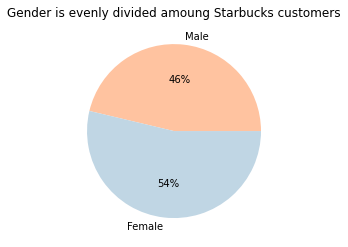

In [4]:
# calling function to generate visual
e.gender_pie(df)

#### What is the age distribution of Starbucks customers?

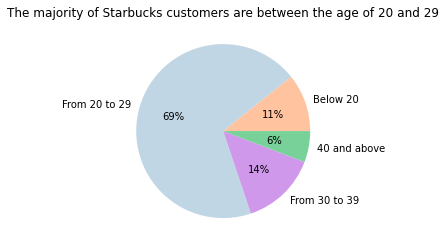

In [5]:
# calling function to generate visual 
e.age_pie(df)

#### What is the employment distribution of Starbucks customers?

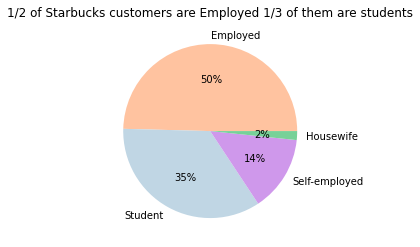

In [6]:
# calling function to generate visual
e.employment_pie(df)

#### What is the income distribution of Starbucks customers?

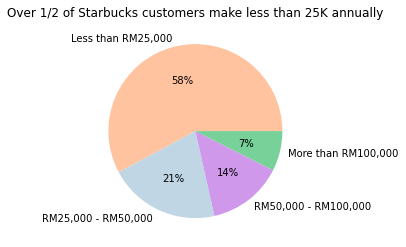

In [7]:
# calling function to generate visual
e.income_pie(df)

#### How often do Starbucks customers visit Satrbucks?

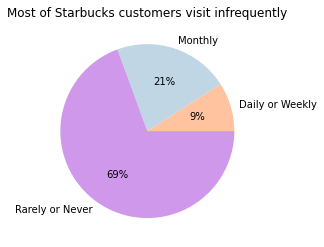

In [8]:
# calling function to generate visual
e.visit_pie(df)

### How many customers live near a Starbucks?

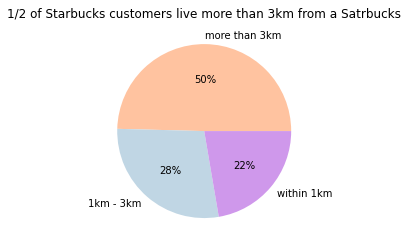

In [9]:
# calling function to generate visual
e.distance_pie(df)

### How much do Customers Spend at Starbucks per visit?

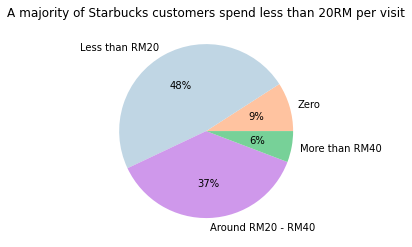

In [10]:
# calling function to generate visual
e.spend_pie(df)

### Majority of Starbucks customers:
* Are young adults aged 20-29
* Make less than RM25,000 annually
* Live more than 3 KM form a Starbucks
* Visit less than once a month
* Spend less than RM20 per visit

### Other findings:
* 1/3 of customers are students and 1/2 are employed in unknown fields
* Customers are nearly evenly split between male and female

### Follow up questions for latter inquiry?
* Do customers that live near Starbucks visit more frequiently?
* Do customers that spend differint amounts per visit represent differint customer groups?
* Do differint Employment types represent differint customer groups?
* Do customers who dine-in spend more?

### A note on Malaysian income:

It is difficult to interpret how servey results regarding income as they are in a currency that is unfamiliar to me.

Malaysia classifies income into three brackets delineating the bottom and middle 40%, and the top 20% of household incomes.

#### The ranges are:

* RM0-RM4,850 for the bottom tier (40%)
* RM4,850-RM8,700 for the mid tier (40%)
* RM8,701-more than RM15,041 for the top tire (20%)

According to the Income Classification in Malaysia: What is B40, M40, and T20 by Rebecca Hani Romeli, a living wage in Malaysia would be RM2,700 per month or RM32,400 per year, almost four times the cutoff for the top 20% of earners.

Because 42% of Starbucks customer base makes more than RM25,000 it would seem that it is serving the top income earners in it's area. a fact that might escape one who looks at the 58% that is below this number. We must keep in mind that a customer who earns less than RM25,000 is still in the top 20% of income earning households, though as suggested above being in the top 20% of earners does not garentee the RM32,400 one would need for a living wage.  

In [11]:
df.dining_type.value_counts()

Take away     49
Dine in       46
Drive-thru    20
Never          6
Name: dining_type, dtype: int64

### Part II: Why do customers come to Starbucks?

### What is the length of customer visits?

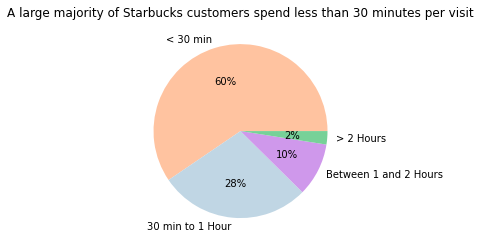

In [12]:
e.visit_length_pie(df)

### Do customers prefer to dine in or take thier food to go?

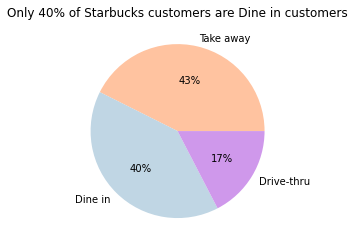

In [13]:
e.dining_type(df)

* 60% of customers place pick up orders 

### What are customers most frequently ordering?

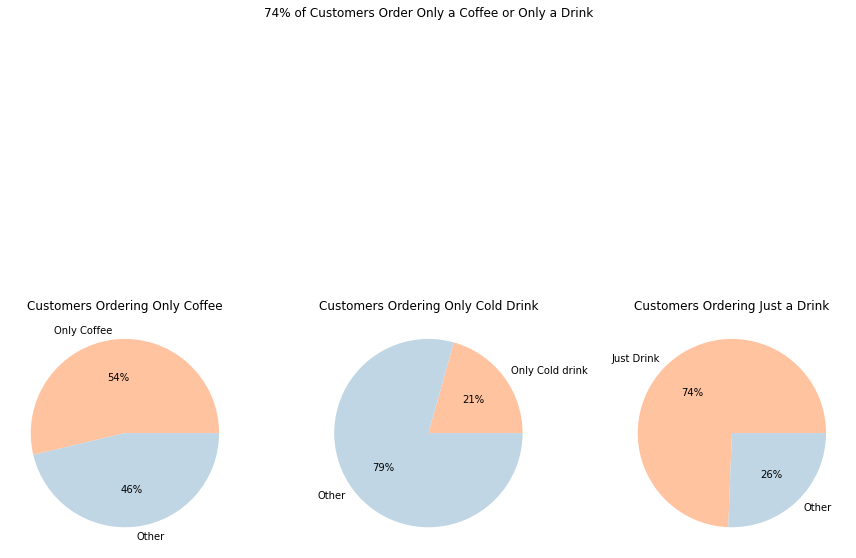

In [14]:
e.coffee_cold_drink_only(df)

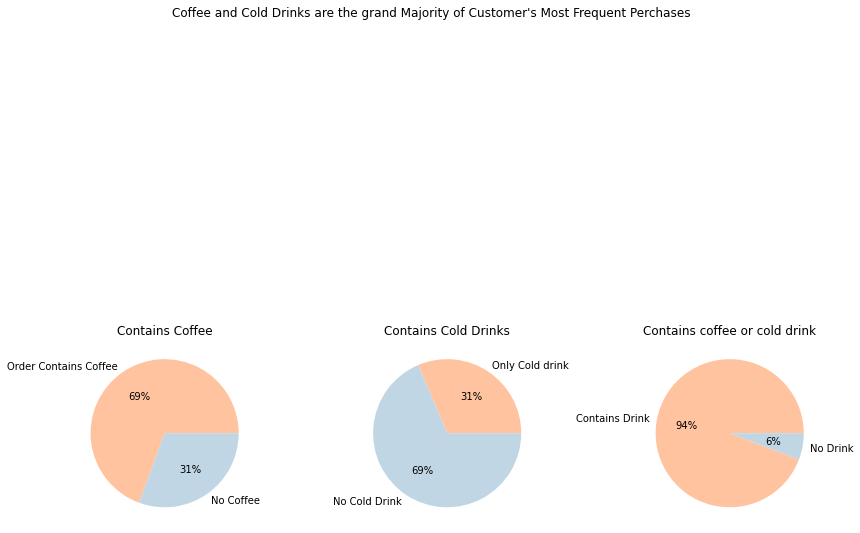

In [15]:
e.coffee_cold_drink_include(df)

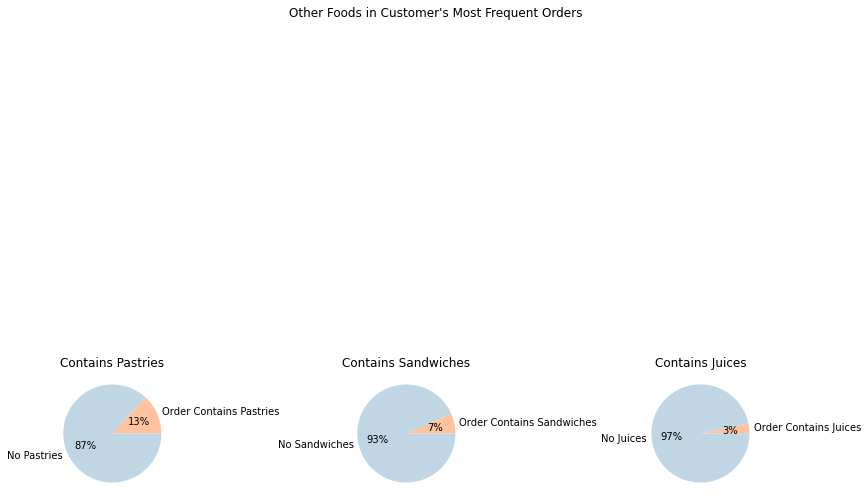

In [16]:
e.other_foods(df)

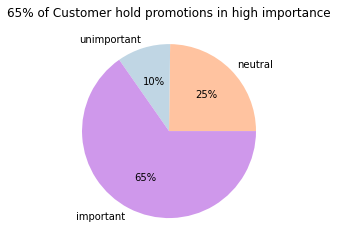

In [17]:
e.omni_pie(df.promotion_importance, "65% of Customer hold promotions in high importance")

In [18]:
df.most_frequent_purchase.value_counts()

Coffee                                           65
Cold drinks                                      25
Coffee;Pastries                                   6
Coffee;Cold drinks                                6
Coffee;Sandwiches                                 3
Cold drinks;Juices;Pastries                       2
Pastries                                          2
Coffee;Cold drinks;Pastries;Sandwiches            1
Nothing                                           1
never                                             1
Never                                             1
Cold drinks;Pastries                              1
Cold drinks;Never                                 1
Coffee;Pastries;Sandwiches                        1
Coffee;Cold drinks;Juices;Pastries;Sandwiches     1
cake                                              1
Coffee;Juices;Pastries;Sandwiches                 1
Jaws chip                                         1
Cold drinks;Pastries;Sandwiches                   1
Name: most_f

### Why do customers come to Starbucks?
* take away or drive through
* Spend < 30 min per visit
* Order one Coffee or one drink most frequently
* Place a high importance on promotions

### Primary prodicts include Coffee and Cold Drinks
* These products are what likely draws customers to Starbucks
* 74% of most frequent orders are for only coffee or only Drinks 
* 94% of most frequent orders contain coffee or cold drinks

### Secondary products include Pastries and Sandwiches
* These products are not what draw people in but pair nicely with primary products
* 13% of most frequent perchases include Pastries
* 7% of most frequent perchases include Sandwiches

### Reccomendation
Incentivising customers to try secondary products using promotions that tie them to primary products could be a way to increase sales. For example: buy a primary product get a secondary product free/at a discount

### Part III: What do customers think of Starbucks?

* brand_rating
* price_rating
* ambiance_rating
* wifi_rating
* service_rating
* continue_buying

### How do customers view our brand compared to other brands?

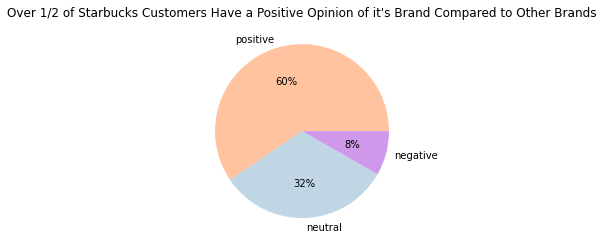

In [19]:
e.omni_pie(df.brand_rating,"Over 1/2 of Starbucks Customers Have a Positive Opinion of it's Brand Compared to Other Brands")

* Only 8% of Starbucks customers have a negative view of it's brand compared to other brands 

### How do customers view our prices?

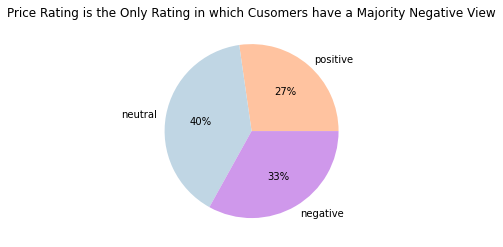

In [20]:
e.omni_pie(df.price_rating,"Price Rating is the Only Rating in which Cusomers have a Majority Negative View")

### How do customers view the ambiance we provide?

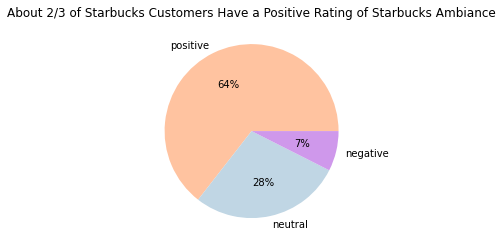

In [21]:
e.omni_pie(df.ambiance_rating,"About 2/3 of Starbucks Customers Have a Positive Rating of Starbucks Ambiance")

### How do customers view our Wifi?

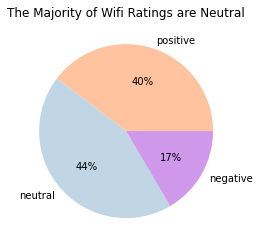

In [22]:
e.omni_pie(df.wifi_rating,"The Majority of Wifi Ratings are Neutral")

### How do customers view the service we provide?

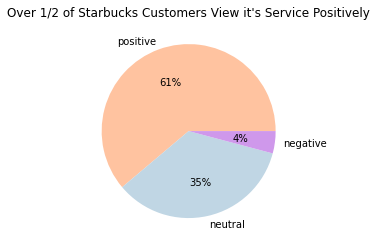

In [23]:
e.omni_pie(df.service_rating,"Over 1/2 of Starbucks Customers View it's Service Positively")

### Do customers plan to continue buying from starbucks?

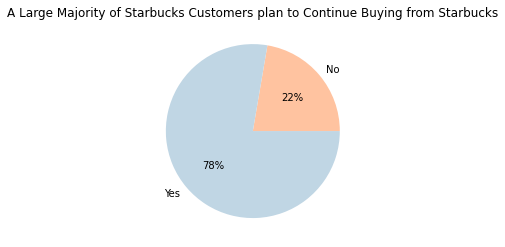

In [24]:
e.omni_pie(df.continue_buying, "A Large Majority of Starbucks Customers plan to Continue Buying from Starbucks")

### Part III: What do customers think of Starbucks?

* A majority of customers view Starbucks favorably compared to other brands
* A majority of customers view Starbucks ambiance favorably 
* A majority of customers view Starbucks service favorably 

* The only Majority Negative is prices at 33%

* The only Majority neutral response came about the Wifi 44%. It this because most of our customers don't use the Wifi we offer? 

* A majority of customers plan to continue buying at Starbucks.

### Part IV: Miscellaneous
* membership_card
* promotions_from

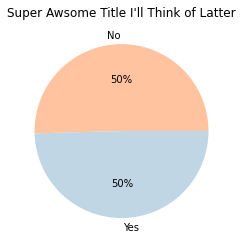

In [25]:
e.omni_pie(df.membership_card)

In [26]:
# Get a list of values from promotions from column
value_list = df.promotions_from.to_list()

# holds final list of seperated values
item_list = []

# Splits each value by ';' and adds it to the item list if it is not already in the list 
for value in value_list:
    
    value = value.split(';')
    
    for item in value:
        
        if item not in item_list:
            
            item_list.append(item)

# Creates a dummy column for each item in the item list 
# for values for values in promotions from that contain the item
for item in item_list:

    df[f'{item}'] = df['promotions_from'].str.contains(f'{item}')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [27]:
df['Social Media'].value_counts()

True     89
False    32
Name: Social Media, dtype: int64

In [28]:
df.promotions_from.value_counts()

Social Media                                                                                                                                   31
Social Media;Through friends and word of mouth                                                                                                 14
Through friends and word of mouth                                                                                                               9
Starbucks Website/Apps;Social Media                                                                                                             9
In Store displays                                                                                                                               7
Starbucks Website/Apps                                                                                                                          6
Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth                                                

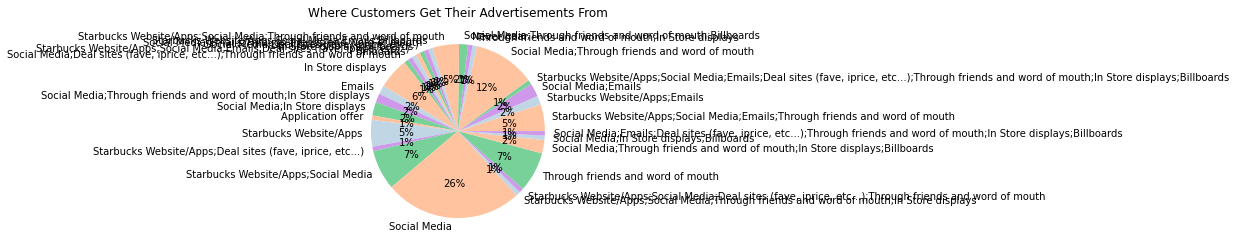

In [29]:
e.omni_pie(df.promotions_from,"Where Customers Get Their Advertisements From")